In [ ]:
#A) Data & Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/6156_Group_Assignment

Mounted at /content/drive
/content/drive/My Drive/6156_Group_Assignment


In [3]:
path = "/content/drive/MyDrive/6156_Group_Assignment/Diagnosis_all.csv"
df = pd.read_csv(path)
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4959,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4960,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [4]:
df.shape

(4962, 133)

In [5]:
df["prognosis"].describe()

count                 4962
unique                  41
top       Fungal infection
freq                   122
Name: prognosis, dtype: object

In [6]:
#B) EDA

In [7]:
#Checking null
df.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [8]:
#Checking null
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [9]:
#information about datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [10]:
# Check balance of dependent variable
df['prognosis'].value_counts()

Fungal infection                           122
Hepatitis C                                121
Hepatitis E                                121
Alcoholic hepatitis                        121
Tuberculosis                               121
Common Cold                                121
Pneumonia                                  121
Dimorphic hemmorhoids(piles)               121
Heart attack                               121
Varicose veins                             121
Hypothyroidism                             121
Hyperthyroidism                            121
Hypoglycemia                               121
Osteoarthristis                            121
Arthritis                                  121
(vertigo) Paroymsal  Positional Vertigo    121
Acne                                       121
Urinary tract infection                    121
Psoriasis                                  121
Hepatitis D                                121
Hepatitis B                                121
Allergy      

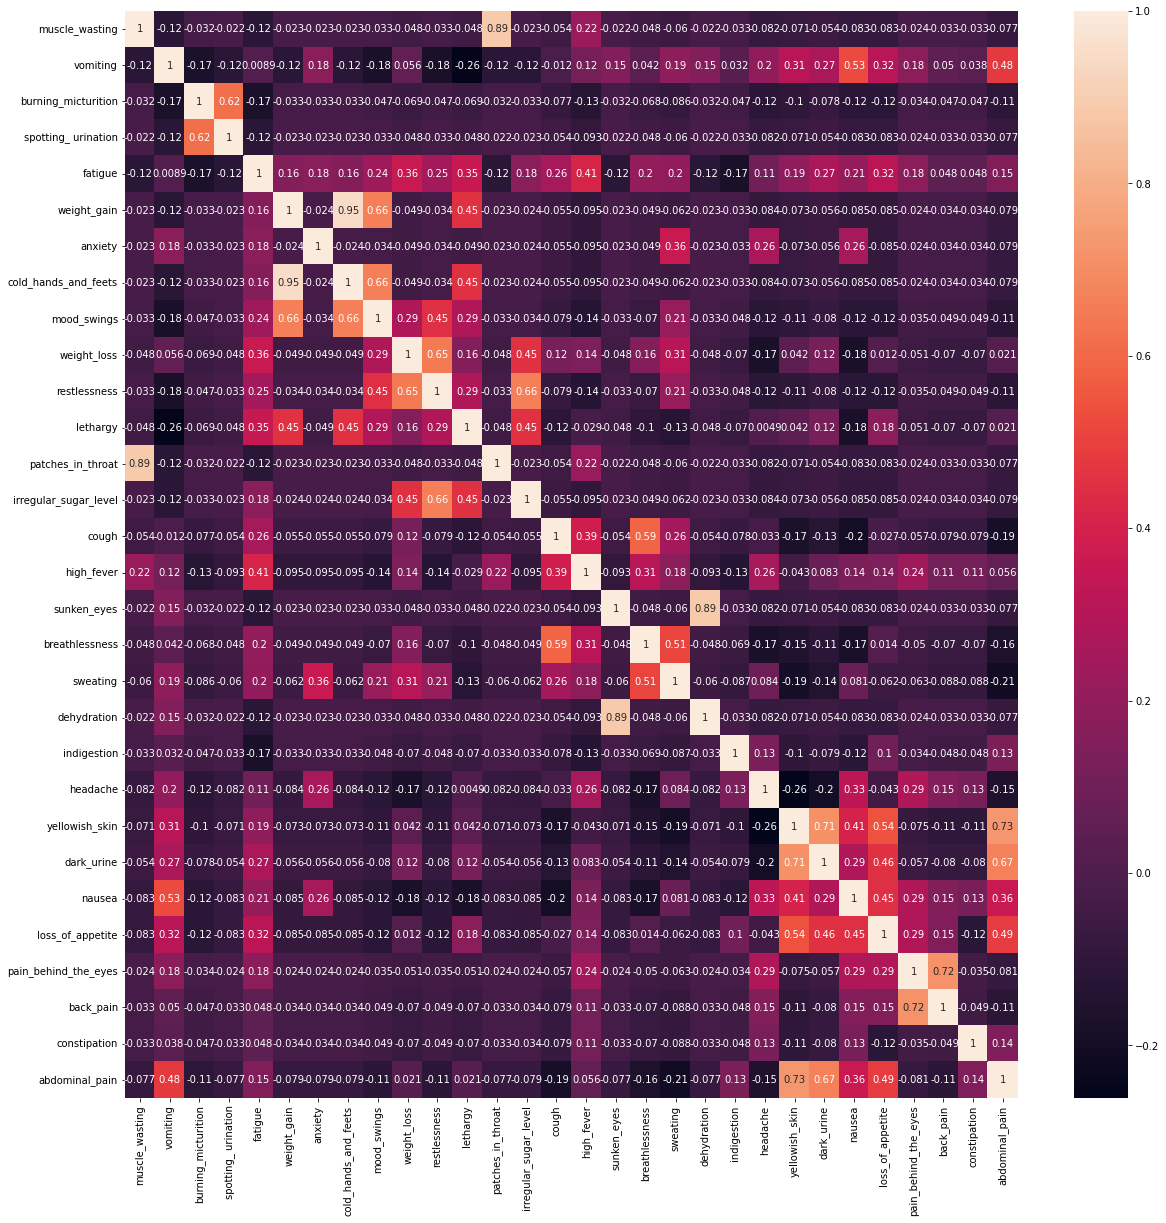

In [11]:
# linear relationships between some of features using correlation heatmap: for example which symptoms occur together?
df_corr = df.iloc[:, 10:40]
plt.figure(figsize = (20, 20))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

We can draw the following inferences:



1.   Sunken eyes is highly correlated with dehydration
2.   Yellowish Skin and Abdominal Pain have a high correlation coefficient
3.   Dark urine is also related to abdominal pain
4.   Cough and Breathlessness also have high correlation



In [12]:
#C) Data Partiotioning

In [13]:
# Modeling target variable
#Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, i.e. y, and not the input X.

T = df['prognosis']
X = df.iloc[:,:-2]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(T.tolist())
print(list(le.classes_))
encoded_target = le.transform(T)
print(encoded_target)

['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma', 'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis', 'Common Cold', 'Dengue', 'Diabetes ', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis', 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']
[15 15 15 ... 35 27 15]


In [14]:
#splitting into testing and training dataset and printing their shapes
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
T = df.iloc[:, -1]


X_train,X_test,t_train,t_test=train_test_split(X,T,test_size=0.2)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (3969, 132)
Train target shape: (3969,)
Test data shape: (993, 132)
Test target shape: (993,)


In [15]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # k = 5
knn.fit(X_train, t_train)
prediction = knn.predict(X_test)
print("Prediction list: {}".format(prediction[0:20]))
print("With KNN (K=5) accuracy is: ",knn.score(X_test, t_test))

Prediction list: ['Dimorphic hemmorhoids(piles)' 'Cervical spondylosis' 'Arthritis'
 'Tuberculosis' 'Allergy' 'Malaria' 'Chronic cholestasis'
 'Peptic ulcer diseae' 'Hypertension ' 'Dimorphic hemmorhoids(piles)'
 'Typhoid' 'Chicken pox' 'Chronic cholestasis' 'Bronchial Asthma'
 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Dengue' 'Hepatitis B'
 'Heart attack' 'Diabetes ']
With KNN (K=5) accuracy is:  1.0


In [16]:
#Model Complexity
neighbors = np.arange(1,25)   # for k tuning
train_accuracy = []
test_accuracy = []
# Loop for different k values
for i, k in enumerate(neighbors):
    # k from 1 to 25 (excluded)
    knn = KNeighborsClassifier(n_neighbors = k)
    # fit the knn
    knn.fit(X_train, t_train)
    # train accuracy
    train_accuracy.append(knn.score(X_train, t_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, t_test))

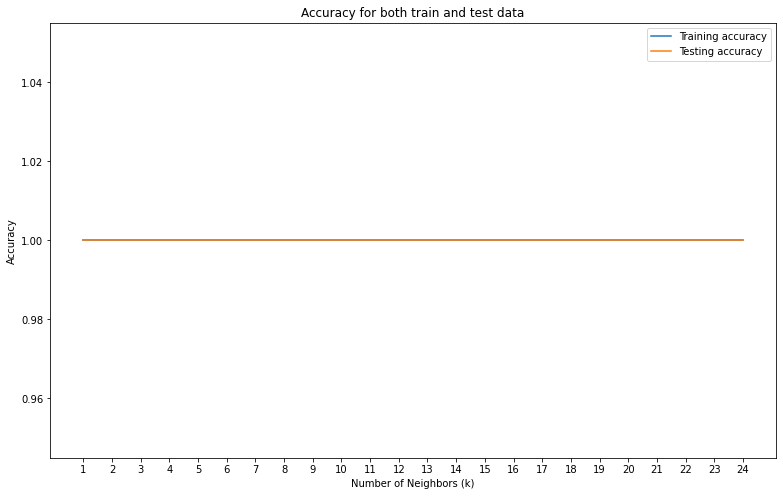

In [17]:
# Plot the accuracies
plt.figure(figsize = (13,8))
plt.plot(neighbors, train_accuracy, label = "Training accuracy")
plt.plot(neighbors, test_accuracy, label = "Testing accuracy")
plt.legend()
plt.title("Accuracy for both train and test data")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
knn.fit(X_train, t_train)
k = 5 # for K-fold cross validation
cv_result = cross_val_score(knn, X_train, t_train, cv = k) # uses R^2 score
print("CV scores: ", cv_result)
print("CV scores average: ", np.sum(cv_result)/len(cv_result))

CV scores:  [1. 1. 1. 1. 1.]
CV scores average:  1.0


In [19]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42, n_estimators = 100)
rfc.fit(X_train, t_train)
rfc.predict(X_test)
rfc.score(X_test, t_test)

1.0

In [20]:
#Metrics

t_predictions = {"KNN": knn.predict(X_test),
          "RFC": rfc.predict(X_test)}

from sklearn.metrics import classification_report, confusion_matrix

for classifier, t_pred in t_predictions.items():
    cm = confusion_matrix(t_test, t_pred)
    print(classifier,'Confusion matrix: \n',cm)
    print("------------------")
    print(classifier, 'Classification report: \n',classification_report(t_test,t_pred))

KNN Confusion matrix: 
 [[27  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 16]]
------------------
KNN Classification report: 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        27
                                   AIDS       1.00      1.00      1.00        32
                                   Acne       1.00      1.00      1.00        26
                    Alcoholic hepatitis       1.00      1.00      1.00        26
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        27
                   Cervical spondylosis       1.00      1.00      1.00        22
                            Chicken pox   